In [2]:
cd ..

/Users/nguyen/projects/checkgrid


In [4]:
from checkgrid.agenda import Agenda
from checkgrid.task import Task

import spacy
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
stringlist = ["buy dog food",
              "wash the car", 
              "reply to client",
              "meeting at Starbucks",
              "job fair",
              "carrots",
              "paper towels",
              "wine",
              "gift for Max",
              "potatoes",
              "notebooks",
              "deep learning course", 
              "Ziplocs",
              "tomato soup"]

In [86]:
a = Agenda()

In [87]:
nlp = spacy.load('en')

In [88]:
for item in stringlist:
    task_item = Task(item)
    a.add_task(task_item)

In [89]:
vectorlist = [nlp(task.text).vector for task in a._agenda]
X = np.stack(vectorlist)

In [90]:
X

array([[ 2.4463727 ,  0.94281477,  0.35402393, ...,  0.35308394,
         0.37843004, -0.21417774],
       [ 1.3470153 ,  1.8956646 ,  1.2159381 , ..., -0.19987601,
         0.67765236,  0.19373482],
       [ 1.7583257 ,  0.05642255,  1.0713167 , ...,  0.20121507,
         0.08450678,  0.04582195],
       ...,
       [ 0.30093786,  0.1882627 , -1.4257296 , ...,  0.26435122,
         0.20384522, -0.17570214],
       [-1.0857319 ,  0.8802606 ,  4.605983  , ...,  0.2352458 ,
         0.37263033, -0.5284542 ],
       [-0.8143158 ,  0.0072438 ,  0.0458684 , ...,  0.6748451 ,
        -0.04348268,  0.19375853]], dtype=float32)

In [91]:
km = KMeans(6)
labels = km.fit_predict(X)

In [92]:
labels

array([5, 5, 3, 3, 0, 1, 2, 2, 3, 1, 1, 0, 4, 0], dtype=int32)

In [93]:
np.argwhere(labels == 0).flatten()

array([ 4, 11, 13])

In [94]:
for label in np.unique(labels):
    print(label)
    indices = np.argwhere(labels == label).flatten()
    for idx in indices:
        print(a._agenda[idx].text)

0
job fair
deep learning course
tomato soup
1
carrots
potatoes
notebooks
2
paper towels
wine
3
reply to client
meeting at Starbucks
gift for Max
4
Ziplocs
5
buy dog food
wash the car


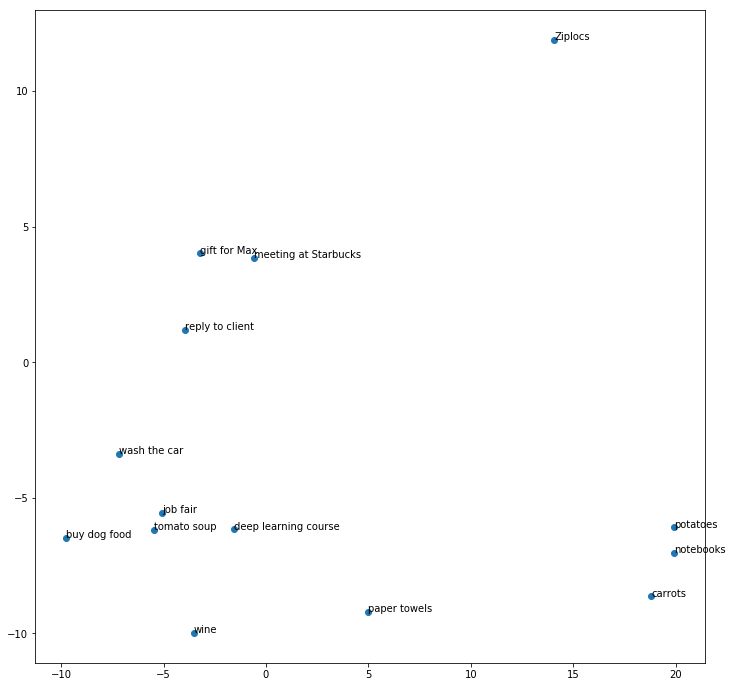

In [95]:
a.plot_agenda_2d()